In [1]:
from PIL import Image
import torch
import re
import os
import pickle
import numpy as np
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt
import gradio as gr
import io

In [2]:
# Create an empty list to store the X/image arrays
image_arrays = []
# Specify the directory containing the images
image_dir = "../Data/testing"
# Regular expression pattern to extract numeric part from filename
for i in range(len(os.listdir(image_dir))):
    #file name
    file = image_dir + '/image_'+str(i)+'.png'
     # Load the image
    image = Image.open(file)      
    # Convert the image to a NumPy array
    image_array = np.array(image)           
     # Append the image array to the list
    image_arrays.append(image_array)
#printing # of images
print(f'Number of images = {len(image_arrays)}')

Number of images = 678


In [8]:
def process_image(input_image):
    #Preprocess the image back into jpg
    # Convert the image data back to the range [0, 255]
    input_image = Image.fromarray((input_image * 255).astype('uint8'))  # Convert to PIL Image

    # Convert the image to grayscale
    input_image_gray = input_image.convert('L')

    # Display the input image
    display(input_image_gray)
    
    return input_image_gray

In [9]:
def prediction(img):
    img_png = process_image(img)

    # convert image as np array and normalize
    img = img.astype(np.float32)/255
    # Add a channel dimension for grayscale images
    img = np.expand_dims(img, axis=0)  # Add channel dimension
    
    #load model
    model = keras.models.load_model('model.keras')
    # make prediction
    predictions = model.predict(img)
    
    print(predictions)
    return predictions, img_png

In [11]:
def check_size(input):
    input = int(input)
    size = 678#len(image_arrays)
    if input >0 and input <= size:
        return "good"
    else:
        return "bad"

In [12]:
def plot_predictions(predictions):
    # Convert predictions to a PyTorch tensor
    predictions_tensor = torch.tensor(predictions)

    # Normalize probabilities to percentages
    percentage_predictions = predictions_tensor* 100
    # Plot the percentages using a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(percentage_predictions[0])), percentage_predictions[0])
    plt.ylabel('Percentage')
    plt.xticks(range(len(percentage_predictions[0])),['benign','guns','knives','razor blades','shuriken'])
    plt.grid(axis='y')
    plt.show()
#     plt.savefig('bar_graph.png')  # Save the bar graph
#     plt.close()
#    return 'bar_graph.png'
    # Save the plot as bytes
    img_bytes = io.BytesIO()
    plt.savefig(img_bytes, format='png')
    img_bytes.seek(0)
    # Close the plot to free memory
    plt.close()
    
    return img_bytes.read()

In [13]:
def model_predictions(input):
    if check_size(input)=="good":
        predictions, img_png = prediction(image_arrays[input-1])
        plot_predictions(predictions)
        return predictions, img_png
    else: 
        print(f'There are only {max_size} images to chose from.')

In [10]:
max_size=len(image_arrays)
print(f'number of images to chose from = {max_size}')

number of images to chose from = 678


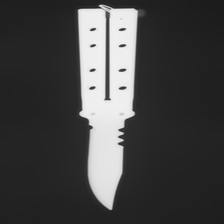

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[1.2158117e-03 2.3714483e-03 1.0000000e+00 1.0266010e-06 6.3449763e-02]]


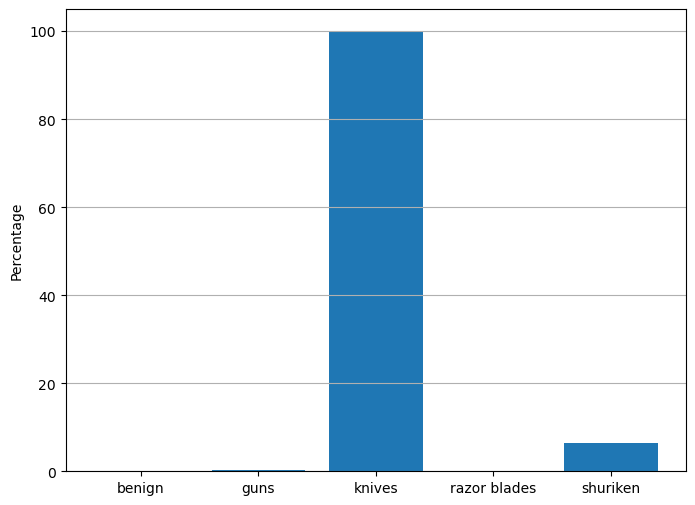

(array([[1.2158117e-03, 2.3714483e-03, 1.0000000e+00, 1.0266010e-06,
         6.3449763e-02]], dtype=float32),
 <PIL.Image.Image image mode=L size=224x224>)

Traceback (most recent call last):
  File "C:\Users\kwan\AppData\Local\anaconda3\envs\dev\lib\site-packages\gradio\queueing.py", line 501, in call_prediction
    output = await route_utils.call_process_api(
  File "C:\Users\kwan\AppData\Local\anaconda3\envs\dev\lib\site-packages\gradio\route_utils.py", line 258, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\kwan\AppData\Local\anaconda3\envs\dev\lib\site-packages\gradio\blocks.py", line 1710, in process_api
    result = await self.call_function(
  File "C:\Users\kwan\AppData\Local\anaconda3\envs\dev\lib\site-packages\gradio\blocks.py", line 1250, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\kwan\AppData\Local\anaconda3\envs\dev\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\Users\kwan\AppData\Local\anaconda3\envs\dev\lib\site-packages\anyio\_

In [19]:
# call to functions to plot predictions based on any of the test images selected by user
# this is the input from user
input = 59
# call to functions to plot image #= input and to plot probability
model_predictions(input)